# Recolección y manejo de los datos

1) Transfiera  el  dataset  a  un  frame  panda  utilizando  el  método `pd.read.csv(‘dirección_dataset_cargado.csv’)`

In [543]:
!git clone https://github.com/ChenaoB/Database

fatal: destination path 'Database' already exists and is not an empty directory.


In [544]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [545]:
"""
Se transfiere la data a pandas
"""
df = pd.read_csv("/content/Database/DataClasificationtMultiClass.csv")

2) Divida el dataset de la siguiente forma: 75% para entrenamiento el restante para validación

In [546]:
"""
Se divide el dataset en 75 para entrenamiento y el restante para test
"""
train_set = df.sample(frac = 0.75, random_state=39)
test_set = df.drop(train_set.index)

"""
Tengo 2 entradas: X1 X2
Tengo 3 tags: 1, -1, -2 (Por tanto es un problema multiclase)
"""
print(train_set[:10])
print(test_set[:10])

           X1        X2  Y
6   -0.561816  2.180823  1
34  -3.445386 -0.257710  1
148 -1.011993 -3.361826 -2
82   2.709089  4.390507 -1
38  -3.622843 -0.691365  1
26  -4.848649 -2.569317  1
128 -0.177514 -2.291634 -2
29  -4.704847 -1.627705  1
143  5.268207  1.954758 -2
131  4.577458  1.562529 -2
          X1        X2  Y
3  -1.398284  1.674042  1
8  -3.023169  0.116955  1
12 -0.493259  1.793166  1
13 -0.023091  2.553153  1
30 -0.549819  2.040167  1
31 -3.348989 -0.252278  1
33 -4.430257 -1.598766  1
36 -1.740014  0.563963  1
40 -0.599669  1.764361  1
41 -2.778348  0.267897  1


# Modelo del perceptron

Entradas
 - X (x_train / x_test)
 - y (y_train / y_test)
 - w nombrado "weight" (Pesos iniciales)
 - α nombrado "alpha" (Learning rate)

In [547]:
# Construcción de matrices
y_train = train_set["Y"].values
y_test = test_set["Y"].values

x_train = np.column_stack((train_set[["X1", "X2"]].values, np.ones(train_set.shape[0])))
x_test = np.column_stack((test_set[["X1", "X2"]].values, np.ones(test_set.shape[0])))


print(f"Matriz de datos de entrenamiento: \n{[[*data] for data in x_train[:5]]}")
print(f"Matriz de etiquetas de entrenamiento: \n{y_train[:5]}", end="\n\n")

print(f"Matriz de datos de test: \n{[[*data] for data in x_test[:5]]}")
print(f"Matriz de etiquetas de test: \n{y_test[:5]}")

print(f"Conjunto de etiquetas: \n{np.unique(y_train)}")

Matriz de datos de entrenamiento: 
[[-0.5618156706, 2.180822928, 1.0], [-3.445386433, -0.2577095537, 1.0], [-1.011993341, -3.361825625, 1.0], [2.709088976, 4.390506628, 1.0], [-3.622843101, -0.6913645865, 1.0]]
Matriz de etiquetas de entrenamiento: 
[ 1  1 -2 -1  1]

Matriz de datos de test: 
[[-1.39828397, 1.674042252, 1.0], [-3.02316863, 0.1169548477, 1.0], [-0.4932593848, 1.793166131, 1.0], [-0.02309111741, 2.553153456, 1.0], [-0.5498188339, 2.040167373, 1.0]]
Matriz de etiquetas de test: 
[1 1 1 1 1]
Conjunto de etiquetas: 
[-2 -1  1]


3) Inicialice el vector de parámetros W utilizando algún método de muestreo estadístico, recuerde que para un problema biclase W este tiene tres valores.

In [548]:
# Se definen una cantidad de clases y una cantidad de caracteristicas

num_classes = len(np.unique(y_train))
num_features = x_train.shape[1]

In [549]:
# Usando una distribución uniforme

weight = np.random.rand(num_classes, num_features)
print(f"Pesos iniciales (weight): \n{weight}")

Pesos iniciales (weight): 
[[0.95675414 0.58542658 0.71420145]
 [0.64351504 0.73054912 0.13358952]
 [0.68820426 0.59279502 0.75507831]]


4) Establezca un valor de α (Learning rate) = 0.3

In [550]:
alpha = 0.3

In [551]:
iteration = 100

In [552]:
use_umbral = False

5) Implemente el algoritmo de perceptron para actualizar los valores del vector de parámetros 𝑊 (puede utilizar cualquiera de las alternativas estudiadas en clase)

In [553]:
for iter in range(iteration):
  for item in range(train_set.shape[0]):
    for class_idx in range(num_classes):
      y_predict = np.sign(np.dot(weight[class_idx], x_train[item, :]))
      # Para identifica el tipo de cambio, (Si será positivo o negativo)
      y_class = 1 if y_train[item] == class_idx else -1

      if y_predict != y_class:
        if use_umbral:
            weight[class_idx] += alpha * x_train[item, :] * y_class
        else:
            weight[class_idx] -= 2 * alpha * x_train[item, :] * (y_predict - y_class)

# Analisis del algoritmo

In [554]:
# Curva de decisión

curve_size = np.arange(-3, 5, 3)
curve_length = -(weight[2] + weight[0] * curve_size) / weight[1]

In [555]:
'''
Utilidades para graficar
'''
def draw_tag(tags, stage_set, stage_label = ""):
  unique_tags = np.unique(tags)
  for tag in range(unique_tags.shape[0]):
    index_tag_class = np.where(tags == unique_tags[tag])
    tag_class = stage_set[["X1", "X2"]].iloc[index_tag_class]
    plt.scatter(tag_class["X1"], tag_class["X2"], color=np.random.rand(3,), label=f"{stage_label} X{tag + 1}", s=8)

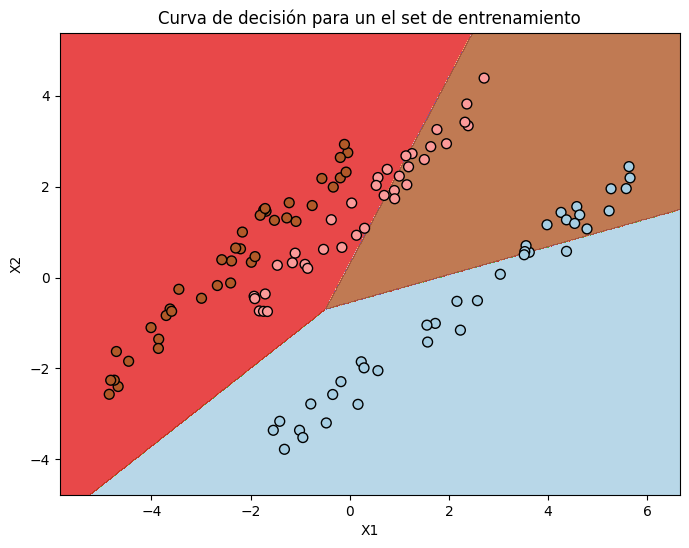

In [556]:
# Visualizar la curva de decisión
plt.figure(figsize=(8, 6))

# Crear una malla de puntos para la visualización
x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predecir la clase para cada punto en la malla
Z = np.argmax(np.dot(np.column_stack((xx.ravel(), yy.ravel(), np.ones(xx.ravel().shape[0]))), weight.T), axis=1)
Z = Z.reshape(xx.shape)

# Visualizar la curva de decisión
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

# Añadir puntos de datos de muestra
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired, marker='o', s=50)

# Configurar etiquetas y título
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Curva de decisión para un el set de entrenamiento')

# Mostrar el gráfico
plt.show()

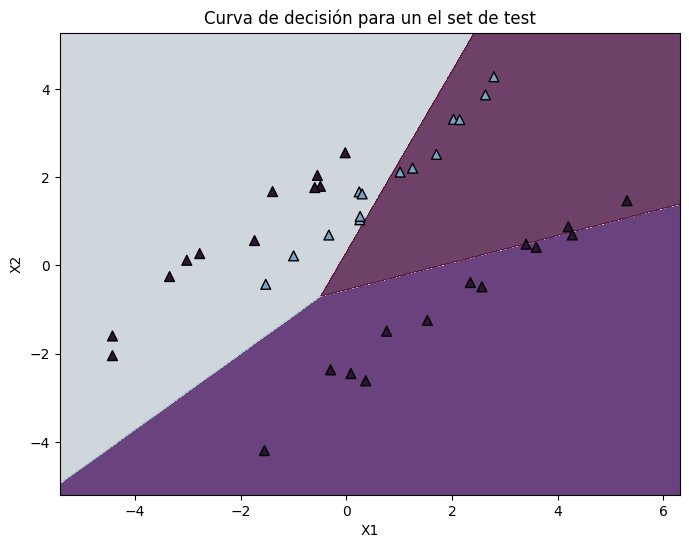

In [557]:
# Visualizar la curva de decisión
plt.figure(figsize=(8, 6))

# Crear una malla de puntos para la visualización
x_min, x_max = x_test[:, 0].min() - 1, x_test[:, 0].max() + 1
y_min, y_max = x_test[:, 1].min() - 1, x_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predecir la clase para cada punto en la malla
Z = np.argmax(np.dot(np.column_stack((xx.ravel(), yy.ravel(), np.ones(xx.ravel().shape[0]))), weight.T), axis=1)
Z = Z.reshape(xx.shape)

# Visualizar la curva de decisión
plt.contourf(xx, yy, Z, cmap=plt.cm.twilight_shifted, alpha=0.8)

# Añadir puntos de datos de muestra
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, edgecolors='k', cmap=plt.cm.twilight_shifted, marker='^', s=50)

# Configurar etiquetas y título
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Curva de decisión para un el set de test')

# Mostrar el gráfico
plt.show()

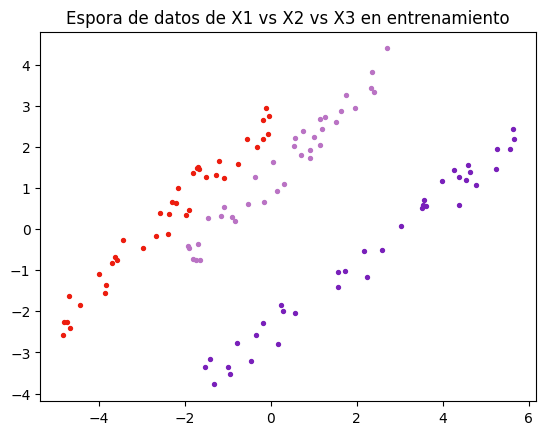

In [558]:
"""
Grafica de X1 vs X2 vs X3 (Train)
"""
draw_tag(y_train, train_set, "(Train)")

plt.title("Espora de datos de X1 vs X2 vs X3 en entrenamiento")
plt.show()

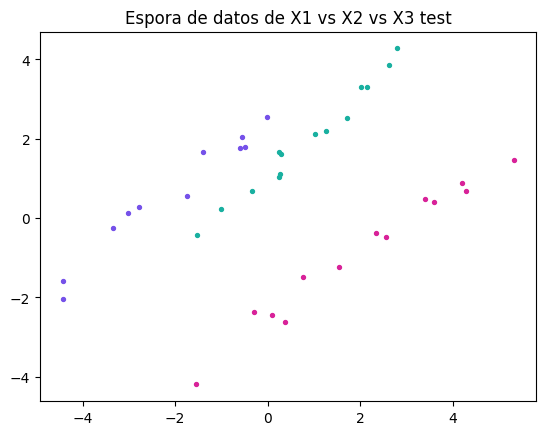

In [559]:
"""
Grafica de X1 vs X2 vs X3 (Test)
"""
draw_tag(y_test, test_set, "(Test)")

plt.title("Espora de datos de X1 vs X2 vs X3 test")
plt.show()

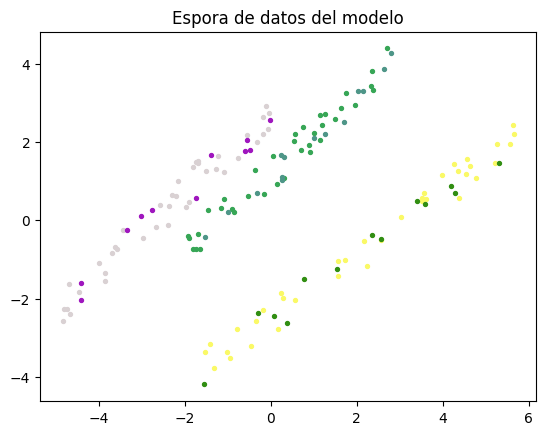

In [560]:
# Grafico de los datos en una misma imagen
"""
Grafica de X1 vs X2 vs X3 (Train)
"""
draw_tag(y_train, train_set, "(Train)")

"""
Grafica de X1 vs X2 vs X3 (Test)
"""
draw_tag(y_test, test_set, "(Test)")

plt.title("Espora de datos del modelo")
plt.show()

In [561]:
'''
Extrayendo caracteristicas para la matriz de confusión
'''

def confusion_matrix(y_true, y_pred, num_classes):
    conf_matrix = np.zeros((num_classes, num_classes), dtype=int)

    for true, pred in zip(y_true, y_pred):
        conf_matrix[true, pred] += 1

    return conf_matrix

# Predicciones en el conjunto de prueba
y_pred_test = np.argmax(np.dot(x_test, weight.T), axis=1)

# Calcular y mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_test, num_classes)
print("Matriz de Confusión:")
print(conf_matrix)


Matriz de Confusión:
[[ 0  0  0]
 [11 11  2]
 [ 0  7  7]]


In [562]:
'''
Otras analisticas extraidas de la matriz de confusión
'''

# Calcular y mostrar métricas adicionales
accuracy = (conf_matrix.diagonal().sum()) / conf_matrix.sum()
precision = conf_matrix.diagonal() / conf_matrix.sum(axis=0)
recall = conf_matrix.diagonal() / conf_matrix.sum(axis=1)
f1_score = 2 * (precision * recall) / (precision + recall)

# Se ignora la división por 0 (Se espera que eso suceda)
np.seterr(divide='ignore', invalid='ignore')

print(f"Exactitud: \n{accuracy}")
print(f"Precisión por clase: \n{precision}")
print(f"Recall por clase: \n{recall}")
print(f"F1-Score por clase: \n{f1_score}")

Exactitud: 
0.47368421052631576
Precisión por clase: 
[0.         0.61111111 0.77777778]
Recall por clase: 
[       nan 0.45833333 0.5       ]
F1-Score por clase: 
[       nan 0.52380952 0.60869565]


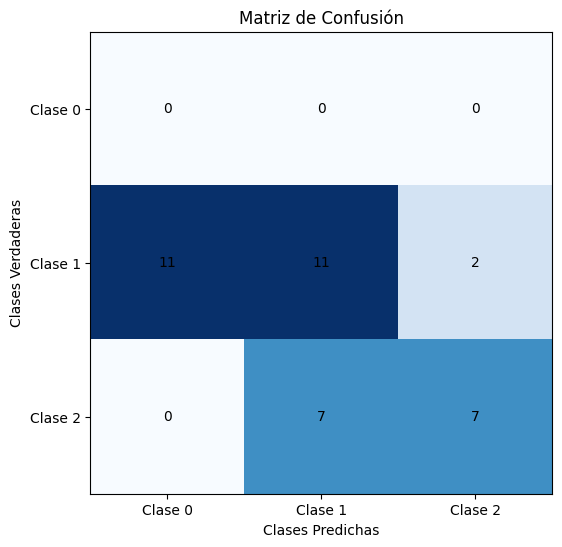

In [563]:
# Configurar el tamaño de la figura
plt.figure(figsize=(8, 6))

# Crear el mapa de calor con plt.imshow
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)

# Mostrar valores en cada celda
for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix[i])):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')

# Configurar etiquetas y título
plt.xticks(range(len(conf_matrix)), ['Clase 0', 'Clase 1', 'Clase 2'])
plt.yticks(range(len(conf_matrix)), ['Clase 0', 'Clase 1', 'Clase 2'])
plt.xlabel('Clases Predichas')
plt.ylabel('Clases Verdaderas')
plt.title('Matriz de Confusión')
plt.show()

# Bibliografia

Para la adaptación se tomó de base practica el articulo [Multi-class Classification One-vs-all & One-vs-one](https://towardsdatascience.com/multi-class-classification-one-vs-all-one-vs-one-94daed32a87b), como base teorica lo visto en clase